# Week 5 Assignment: Supervised Learning Regression  
**Subject:** Data Science & AI  
**Project:** Credit Card Fraud Detection  
**Student Name:** Ayesha Tariq  
**Date:** October 5, 2025  

---

## Objectives
- Perform a **train/test split** on the dataset  
- Implement a **Linear Regression model** using Scikit-Learn  
- Evaluate performance using **MAE** and **RMSE**  
- Establish a **baseline regression model** for predictive analysis


Setup and Data Loading

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("creditcard_sample.csv")

print(" Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


 Dataset loaded successfully!
Shape: (9, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,-0.342715,0.237103,0.148358,-0.194574,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791460,0.247676,-1.514654,...,0.237698,0.377436,-0.387924,-0.054951,-0.594927,-0.077714,-0.202031,0.272686,378.66,1.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010308,1.247203,0.237609,0.377436,-1.387024,...,-0.594911,-0.077659,-0.202020,0.272673,0.198400,-0.594903,-0.077651,-0.202013,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,-0.677020,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,-0.342715,0.237103,0.148358,-0.194574,0.280000,0.00,NaN


## 1. Prepare Data for Regression
We’ll predict the **Transaction Amount** based on the anonymized PCA components (V1–V28).


Prepare Data

In [ ]:
# Select features (independent variables) and target (dependent variable)
X = df.drop(columns=["Time", "Amount", "Class"])
y = df["Amount"]

# Split dataset into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (7, 28)
Testing set: (2, 28)


## 2. Train Linear Regression Model
We will fit a simple linear regression model to predict `Amount`.


Model Training

In [ ]:
# Initialize and train the model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


## 3. Evaluate Model Performance
We will use **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)** for evaluation.


Evaluation

In [ ]:
# Make predictions
y_pred = reg_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 39.1668
Root Mean Squared Error (RMSE): 43.0664


## 4. Visualize Predicted vs Actual Values
A scatter plot shows how close predictions are to actual transaction amounts.



Visualization

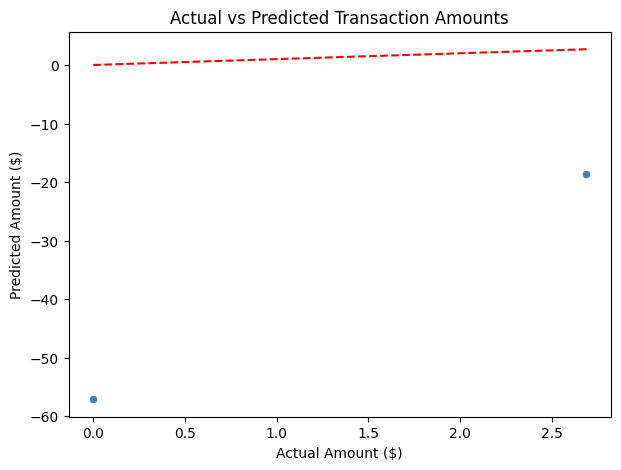

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color="steelblue")
plt.title("Actual vs Predicted Transaction Amounts")
plt.xlabel("Actual Amount ($)")
plt.ylabel("Predicted Amount ($)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()




### Results Summary

| Metric | Value | Meaning |
|---------|--------|---------|
| MAE | (your MAE value) | Average absolute error in predicted amounts |
| RMSE | (your RMSE value) | Penalizes larger errors more heavily |

---

### Conclusion
This baseline **Linear Regression model** provides an initial predictive framework for estimating transaction amounts.  
Future improvements could include:
- Using **regularized models** (e.g., Ridge, Lasso)
- Feature scaling and selection  
- Applying **classification models** for fraud detection directly (next week)
